In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats

from jupyterthemes import jtplot
jtplot.style()

# Q1 - Generate

Sample and plot 500 values from the following time series, at least 3 times each:

1. Plot AR(3), with delta=0, theta=[0.5, 0.5, -1], error_std=0.1, zero as initial values
1. Plot AR(1), with delta=0.5, theta=[-0.5], error_std=0.1, zero as initial values
1. Plot AR(3), with delta=10, theta=[0.5, -0.5, -0.5], error_std=0.1, zero as initial values
1. Plot AR(5), with delta=10, theta=[0.5, -0.5, -0.5, -0.5, -0.5], error_std=0.1, zero as initial values
1. Plot AR(4), with delta=10, theta=[0.5, -0.6, -0.4, 1], error_std=0.1, zero as initial values
1. Plot AR(4), with delta=10, theta=[0.5, -0.5, -0.5, 1], error_std=0.1, zero as initial 
1. Plot AR(4), with delta=10, theta=[0.5, -0.5, -0.5, 1], error_std=1, zero as initial 
1. Plot AR(4), with delta=10, theta=[0.5, -0.5, -0.5, 1], error_std=0, zero as initial 
1. Plot AR(5), that repeats the sequence [1, 2, 3, 4, 5]
1. Plot AR(5), that produces the sequence [1, 2, 3, 4, 5, 5, 5, 5, 5, ...]

You are encourged to try other combinations and get a better feel of the dynamics


1. AR(3), delta=0.0, theta=[0.5, 0.5, -1], std error=0.1


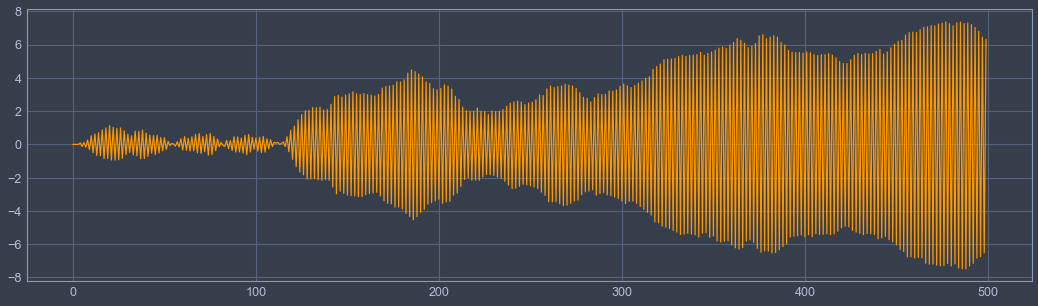

2. AR(1), delta=0.5, theta=[0.5], std error=0.1


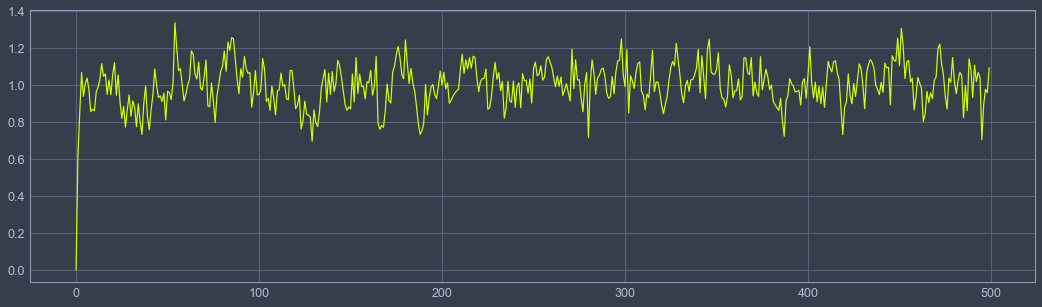

3. AR(3), delta=10.0, theta=[0.5, -0.5, -0.5], std error=0.1


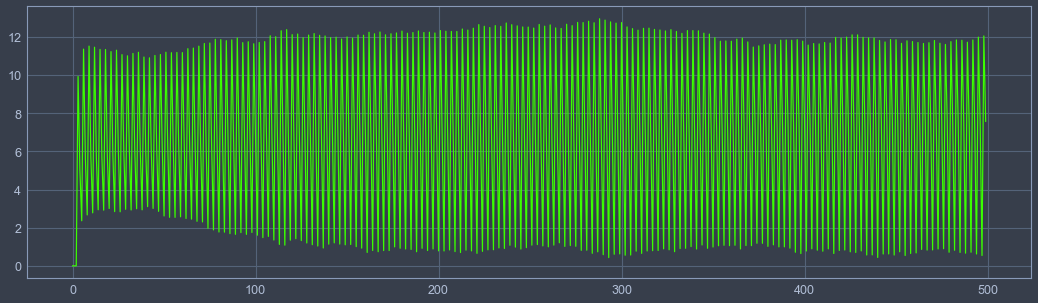

4. AR(5), delta=10.0, theta=[0.5, -0.5, -0.5, -0.5, -0.5], std error=0.1


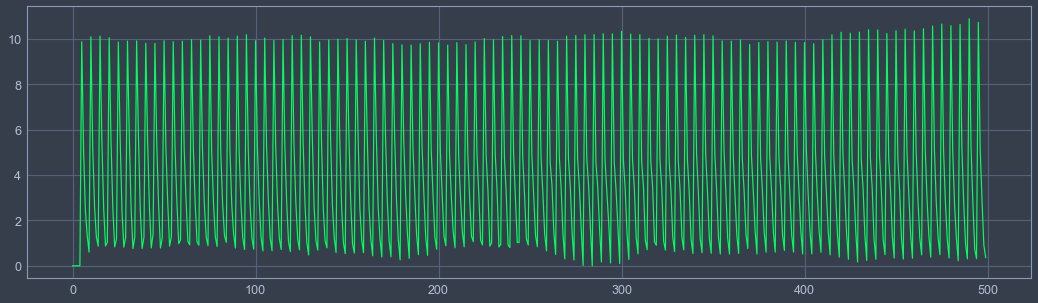

5. AR(4), delta=10.0, theta=[0.5, -0.6, -0.4, 1], std error=0.1


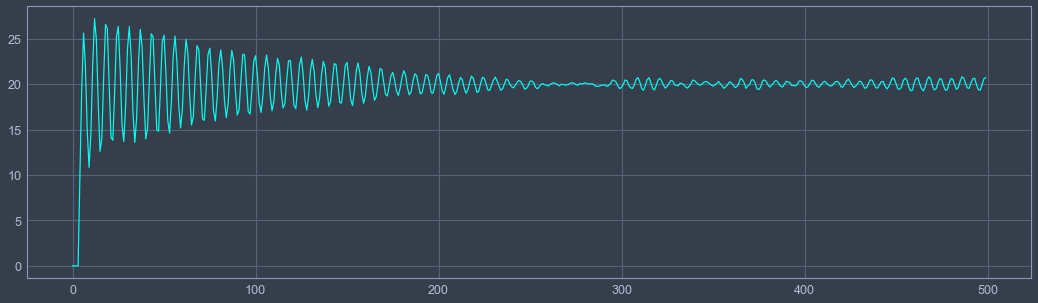

6. AR(4), delta=10.0, theta=[0.5, -0.5, -0.5, 1], std error=0.1


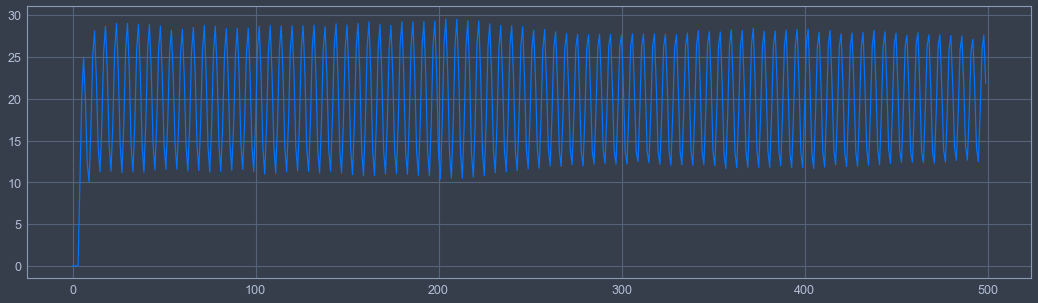

7. AR(4), delta=10.0, theta=[0.5, -0.5, -0.5, 1], std error=1.0


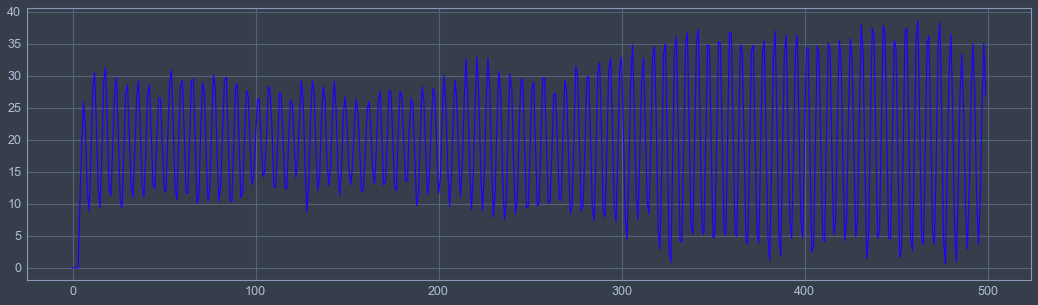

8. AR(4), delta=10.0, theta=[0.5, -0.5, -0.5, 1], std error=0.0


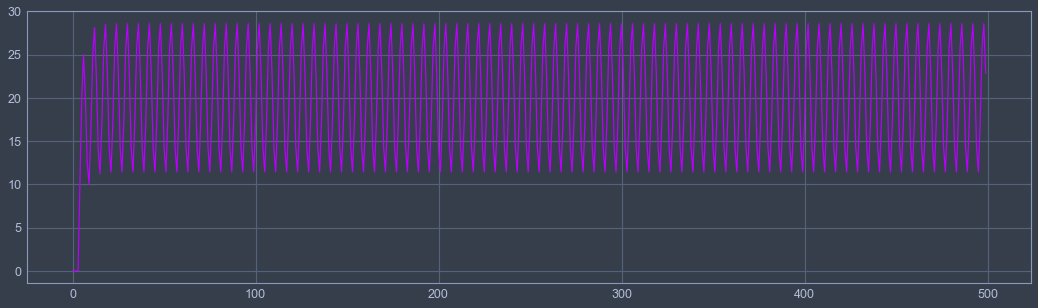

9. AR(5), delta=0.0, theta=[1, 0, 0, 0, 0], std error=0.0


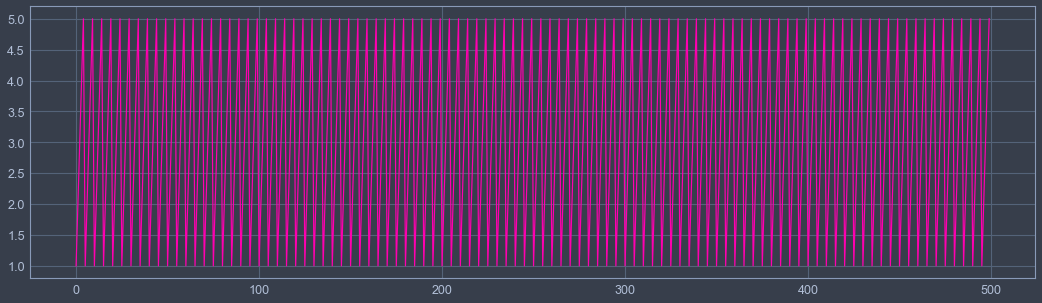

10. AR(5), delta=0.0, theta=[0, 0, 0, 0, 1], std error=0.0


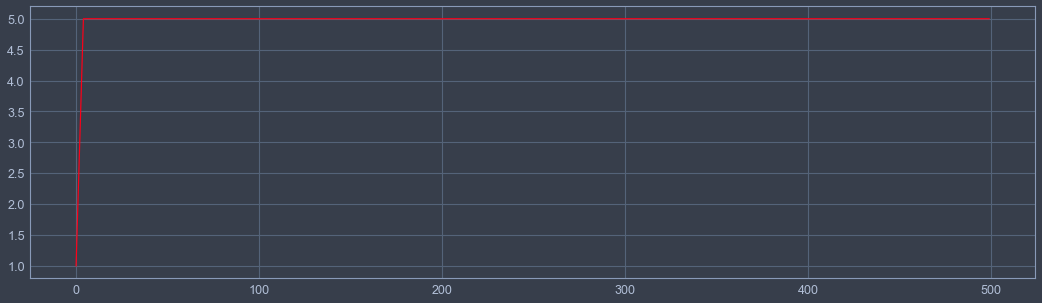

In [155]:
def AR(n, delta, theta, error_std, initial_values=None, sample_size=500):
    return_list = []
    theta = np.array(theta)
    if initial_values is None:
        return_list = [0] * n
    else:
        return_list.extend(initial_values)
            
    for i in range(n, sample_size):
        X_i = delta + np.dot(theta,np.array(return_list[-n:])) + np.random.normal(0, error_std)
        return_list.append(X_i)
    
    return return_list

def plot_AR(n, delta, theta, error_std, initial_values=None, sample_size=500, q=0):
    sample = AR(n, delta, theta, error_std, initial_values, sample_size)    
    print('%sAR(%d), delta=%.1f, theta=%s, std error=%.1f' % ('' if q == 0 else '%d. ' % q, n, delta, str(theta), error_std))
    plt.figure(figsize=(18,5))
    plt.plot(range(sample_size),sample, c=plt.cm.get_cmap('hsv', 11)(q))
             #plt.cm.get_cmap('hsv', 2)(1))
    plt.show()
    
plot_AR(3,0,[0.5,0.5,-1], 0.1, q=1)
plot_AR(1,0.5,[0.5], 0.1, q=2)
plot_AR(3, 10, [0.5,-0.5,-0.5], 0.1, q=3)
plot_AR(5, 10, [0.5, -0.5, -0.5, -0.5, -0.5], 0.1, q=4)
plot_AR(4, 10, [0.5, -0.6, -0.4, 1], 0.1, q=5)
plot_AR(4, 10, [0.5, -0.5, -0.5, 1], 0.1, q=6)
plot_AR(4, 10, [0.5, -0.5, -0.5, 1], 1, q=7)
plot_AR(4, 10, [0.5, -0.5, -0.5, 1], 0, q=8)
plot_AR(5, 0, [1,0,0,0,0], 0, [1,2,3,4,5], q=9)
plot_AR(5, 0, [0,0,0,0,1], 0, [1,2,3,4,5], q=10)


# Q2 - Autocorrealtion

Plot the autocorrelation 

1. [1, 0, 0, 0, 0, 1, ...]
1. sin(x) for -10 to 10 in intervals of 0.1 
1. sin(x) + sin(2x) for -10 to 10 in intervals of 0.1 
1. x - the identity function for -10 to 10 in intervals of 0.1 

use `statmodels.tsa`

what is actual period? Can you infer it from the plot? Explain how


In [3]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

1. [1, 0, 0, 0, 0, 1, ...]


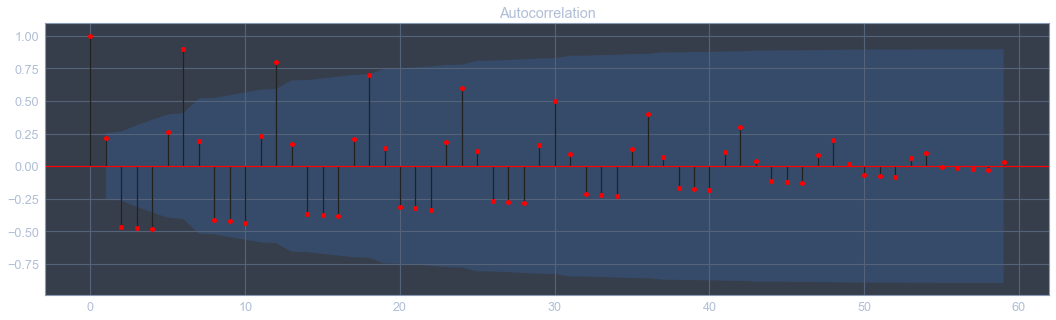

2. sin(x) for -10 to 10 in intervals of 0.1


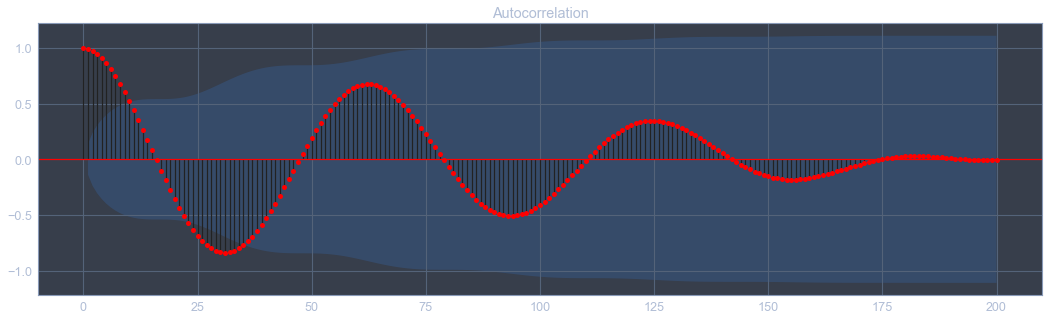

3. sin(x) + sin(2x) for -10 to 10 in intervals of 0.1


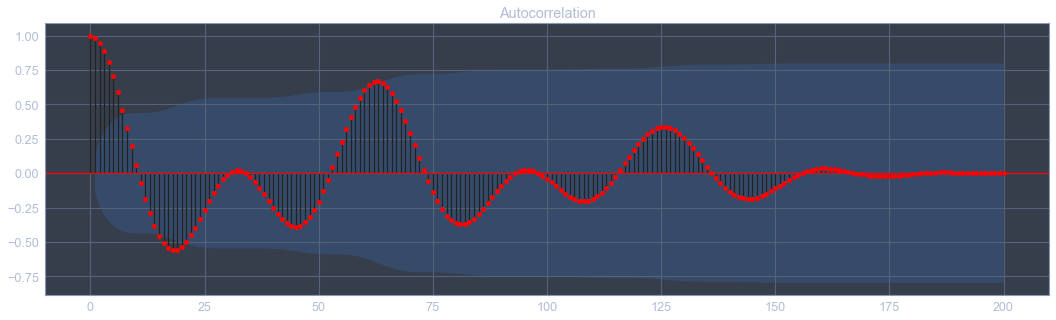

4. x - the identity function for -10 to 10 in intervals of 0.1


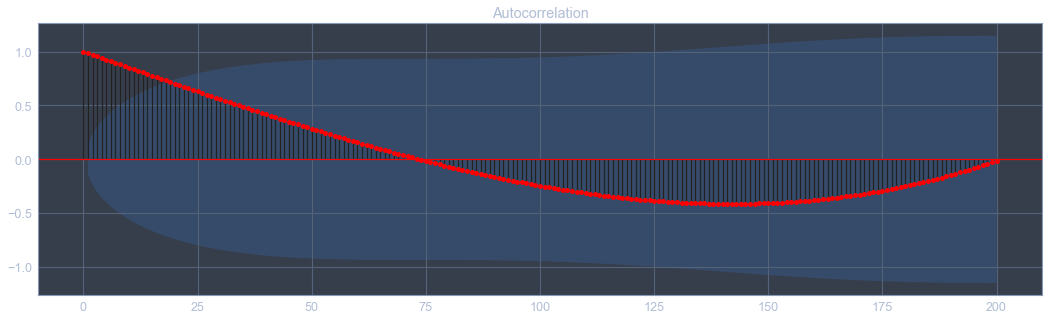

In [4]:
# 1.
print('1. [1, 0, 0, 0, 0, 1, ...]')
series = [1,0,0,0,0,1]*10
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    plot_acf(series, c='red')
    plt.show()

# 2.
print('2. sin(x) for -10 to 10 in intervals of 0.1')
series = list(map(lambda x:np.sin(x), np.arange(-10,10.1,0.1)))
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    plot_acf(series, c='red')
    plt.show()

# 3.
print('3. sin(x) + sin(2x) for -10 to 10 in intervals of 0.1')
series = list(map(lambda x:np.sin(x) + np.sin(2*x), np.arange(-10,10.1,0.1)))
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    plot_acf(series, c='red')
    plt.show()

# 4.
print('4. x - the identity function for -10 to 10 in intervals of 0.1')
series = np.arange(-10,10.1,0.1)
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    plot_acf(series, c='red')
    plt.show()

Actual periods:
1. 6
2. 62
3. 62
4. No periodicity

The period is the lag between two peaks in the autocorrelation.
We can infer it from the chart by looking at 2 consecutive peaks and measuring how many observations are in the interval.

# Q3 - Real Data

Using the porto database we are going to decompose a timeseries to the trend, seasonal and residual components. 

## 3.1. Gather data
Pull out and plot the daily number of rides each day in Porto

In [3]:
import sqlite3
DB_FILENAME = '../taxi_trips.db'
def run_query(query):
    with sqlite3.connect(DB_FILENAME) as con:
        cur = con.cursor()
        cur.execute(query)
        if cur.description is None: 
            return
        col_names = []
        row_values = []
        for col_name in cur.description:
            col_names.append(col_name[0])
        for row in cur.fetchall():
            row_values.append(list(row))
            
        return pd.DataFrame(row_values, columns=col_names)

In [4]:
SQL = "SELECT date(localdatetime) as date, count(*) as n_rides FROM trips group by date(localdatetime)"
df_rides = run_query(SQL)
df_rides = df_rides.set_index('date')
df_rides.index = df_rides.index.astype('datetime64[ns]')
df_rides = df_rides[df_rides.index < '2014-07-01']

df_rides.head()

,n_rides
date,
2013-07-01,4472
2013-07-02,4487
2013-07-03,4539
2013-07-04,5011
2013-07-05,5431


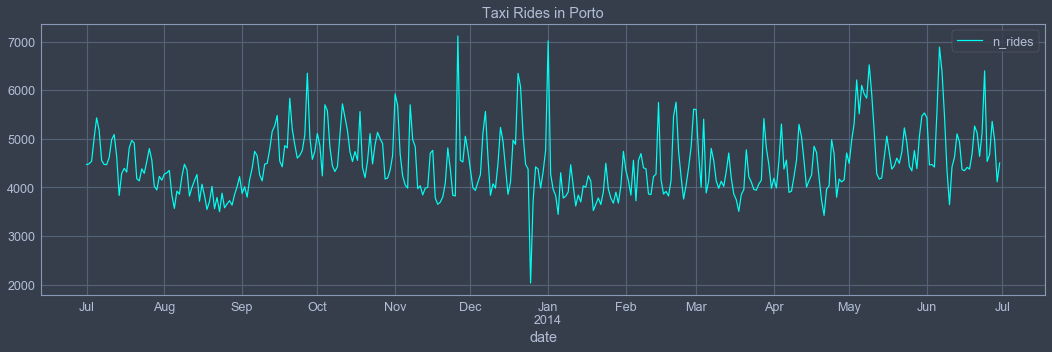

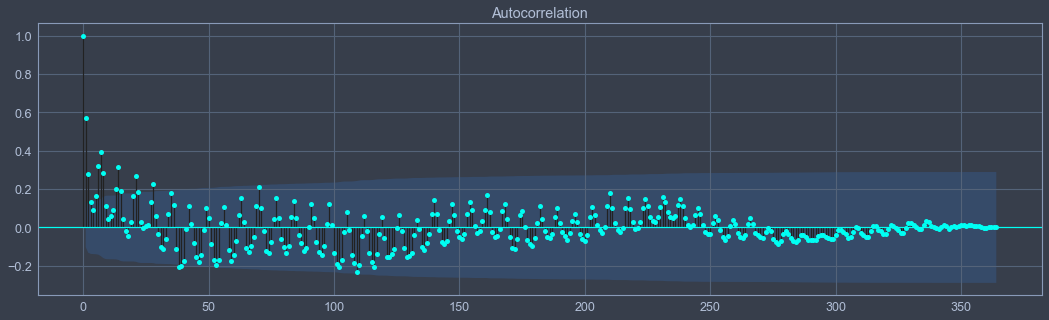

In [170]:
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    df_rides.plot(c=plt.cm.get_cmap('hsv', 5)(2))
    plt.title('Taxi Rides in Porto')
    plt.show()
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    plot_acf(df_rides, c=plt.cm.get_cmap('hsv', 5)(2))
    plt.show()

## 3.2 Detred the data
calc the moving average over 30 days 

1. plot it
1. remove it from the data - keep only the last 11 months


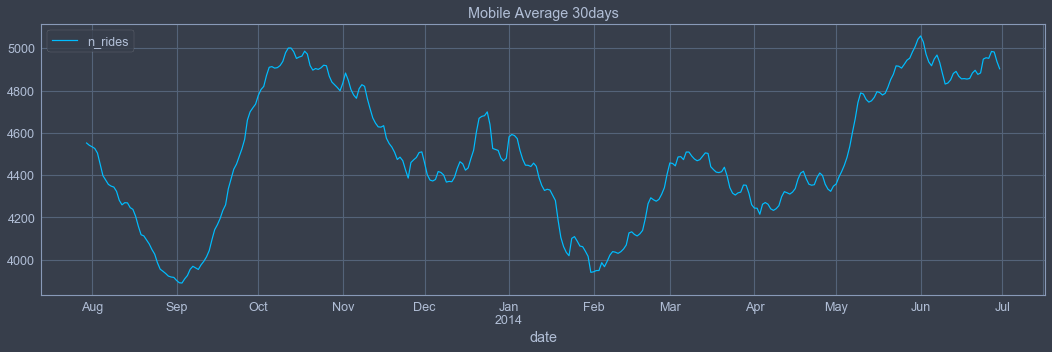

In [176]:
# 1. Plot 30d Moving Average
df_ma_30 = df_rides.rolling(30).mean().dropna()
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    df_ma_30.plot(c=plt.cm.get_cmap('hsv', 30)(16))
    plt.title('Mobile Average 30days')
    plt.show()

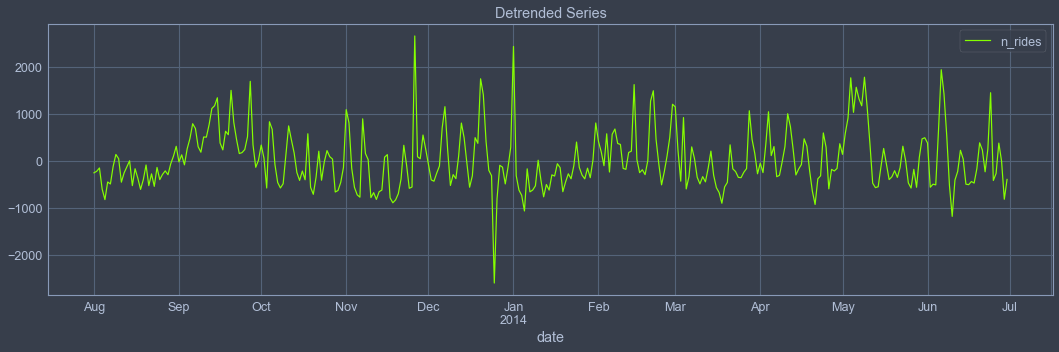

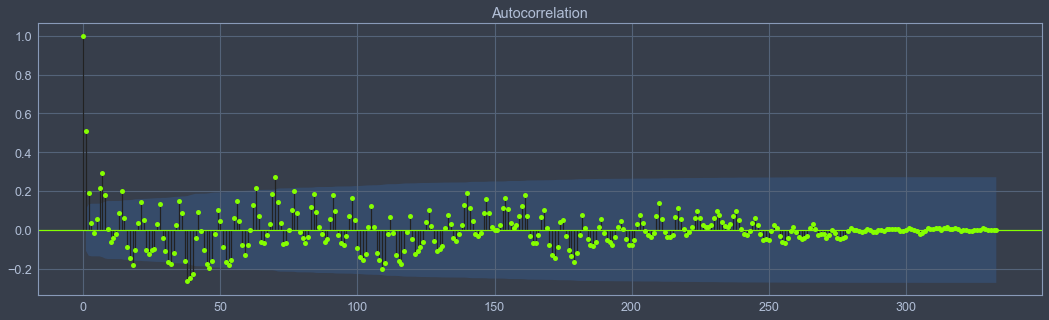

In [169]:
# 2. Detrend the data
df_detrended = df_rides - df_ma_30
df_detrended = df_detrended[df_detrended.index >= '2013-08-01']
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    df_detrended.plot(c=plt.cm.get_cmap('hsv', 5)(1))
    plt.title('Detrended Series')
    plt.show()

with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    plot_acf(df_detrended, c=plt.cm.get_cmap('hsv', 5)(1))
    plt.show()

## 3.3 Determine seasonality
Using the detrened data, detrmine the seasonality. 

Test your self by smoothing the data to the determined seasonality, do you notice more periods?

We notice weekly peaks that are most likely due to week-end activity. We will compute the 7 days moving average in order to smooth the data.

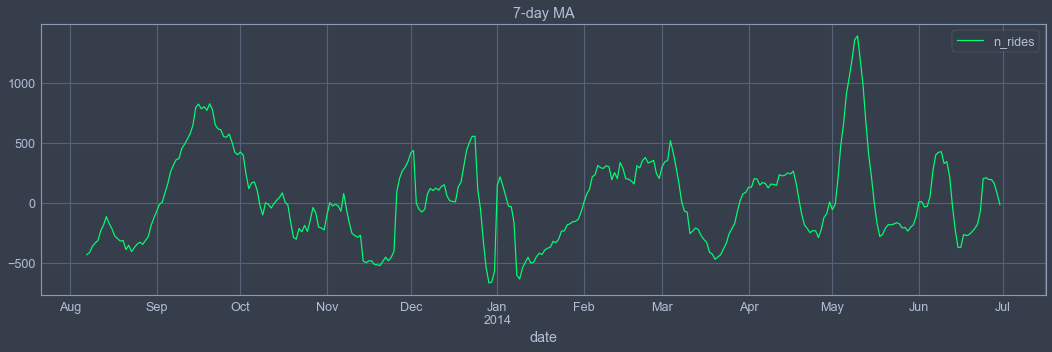

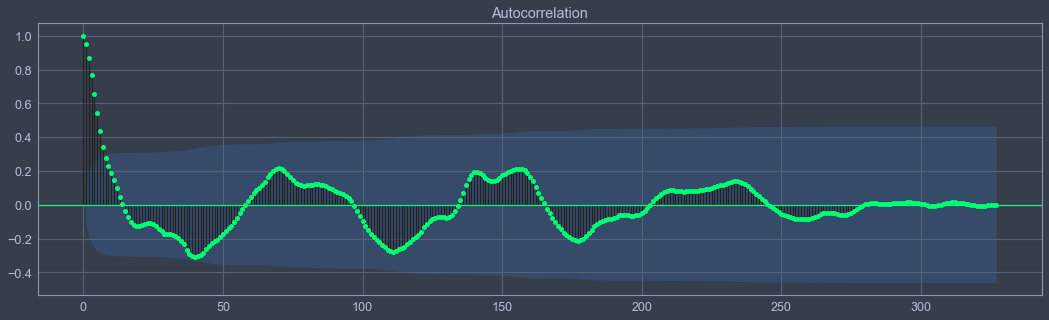

In [180]:
df_smooth = df_detrended.rolling(7).mean().dropna()
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    df_smooth.plot(c=plt.cm.get_cmap('hsv', 30)(12))
    plt.title('7-day MA')
    plt.show()
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    plot_acf(df_smooth, c=plt.cm.get_cmap('hsv', 30)(12))
    plt.show()

The data now looks smoother, but we still notice some trends, although not really periodical.

## 3.4. Fit an AR Model
### 3.4.1 Create training data
On the detrended series - create a table such that for each day, the previous k day values are in the row. Split the data half way to train and test (first months train, later is test). Discard rows with missing history (first ones). Choose k to be triple the period you found.

In [62]:
def previous_k_values(df, k):
    result_df = df.copy()
    for i in range(1, k+1):
        result_df['d-%d'%i] = df['n_rides'].shift(i)
    return result_df.dropna()

k = 21
data = previous_k_values(df_detrended, k)
x_train = data[:int(len(data)/2)]
x_test = data[int(len(data)/2):]

data.head()

,n_rides,d-1,d-2,d-3,d-4,d-5,d-6,d-7,d-8,d-9,...,d-12,d-13,d-14,d-15,d-16,d-17,d-18,d-19,d-20,d-21
date,,,,,,,,,,,,,,,,,,,,,
2013-08-22,-280.233333,-530.900000,-91.000000,-404.233333,-610.200000,-372.433333,-171.133333,-530.466667,-3.000000,-128.766667,...,42.933333,133.333333,-121.133333,-495.233333,-452.633333,-827.666667,-606.300000,-154.166667,-225.200000,-258.133333
2013-08-23,-545.933333,-280.233333,-530.900000,-91.000000,-404.233333,-610.200000,-372.433333,-171.133333,-530.466667,-3.000000,...,-456.933333,42.933333,133.333333,-121.133333,-495.233333,-452.633333,-827.666667,-606.300000,-154.166667,-225.200000
2013-08-24,-143.266667,-545.933333,-280.233333,-530.900000,-91.000000,-404.233333,-610.200000,-372.433333,-171.133333,-530.466667,...,-258.600000,-456.933333,42.933333,133.333333,-121.133333,-495.233333,-452.633333,-827.666667,-606.300000,-154.166667
2013-08-25,-402.733333,-143.266667,-545.933333,-280.233333,-530.900000,-91.000000,-404.233333,-610.200000,-372.433333,-171.133333,...,-128.766667,-258.600000,-456.933333,42.933333,133.333333,-121.133333,-495.233333,-452.633333,-827.666667,-606.300000
2013-08-26,-292.600000,-402.733333,-143.266667,-545.933333,-280.233333,-530.900000,-91.000000,-404.233333,-610.200000,-372.433333,...,-3.000000,-128.766667,-258.600000,-456.933333,42.933333,133.333333,-121.133333,-495.233333,-452.633333,-827.666667


### 3.4.2. Fit an autocorrelation model
Try to train a regressor for different lags, report scores. For which lag do you get the best score?
keep it and print it coeefcients and intercept


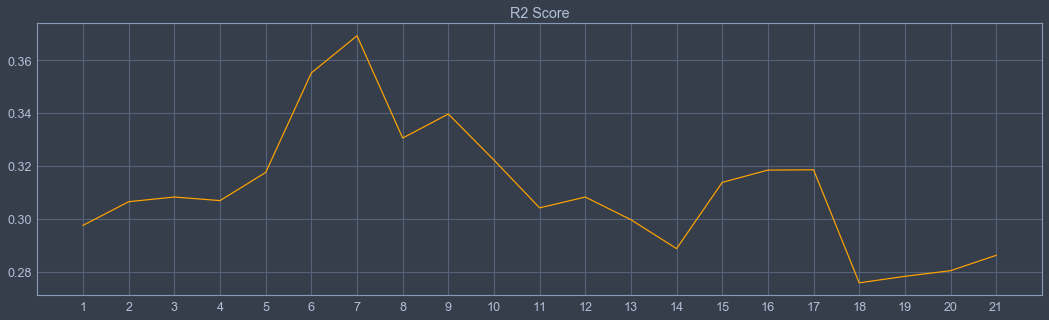

In [138]:
def train_regression_for_lag(x_train, x_test, k):
    # First generate col names from d-1 to d-k
    col_names = ['d-%d' % (i+1) for i in range(k)]
    
    model = linear_model.LinearRegression()
    model.fit(np.array(x_train[col_names]), np.array(x_train['n_rides']).reshape(-1,1))
        
    # Make predictions using the testing set
    predictions = model.predict(np.array(x_test[col_names]))
    coef = model.coef_[0]
    intercept = model.intercept_[0]
    mse = mean_squared_error(np.array(x_test['n_rides']).reshape(-1,1), predictions)
    r2 = r2_score(np.array(x_test['n_rides']).reshape(-1,1), predictions)
    
    return model, predictions, coef, intercept, mse, r2

coef_list = []
intercept_list = []
mse_list = []
r2_list = []

for i in range(k):
    # Train the model against the lagged data for each k
    model, predictions, coef, intercept, mse, r2 = train_regression_for_lag(x_train, x_test, i+1)
    
    coef_list.append(coef)
    intercept_list.append(intercept)
    mse_list.append(mse)
    r2_list.append(r2)

# Plot R2
plt.figure(figsize=(18,5))
plt.title('R2 Score')
plt.plot(np.array(range(k))+1, r2_list, c='orange')
plt.xticks(np.array(range(k))+1)
plt.show()

The best score is obtained with a lag of 7 which confirms our previous intuition that there is a 7day seasonality.

In [139]:
# Get best lag index
k_best_lag = r2_list.index(max(r2_list))
intercept = intercept_list[k_best_lag]
coefs = coef_list[k_best_lag]

# Create equation for a nice display
lin_equation = ' + '.join(['%.2f*x(t-%d)' % (coef, i+1) for i, coef in enumerate(coefs)])
lin_equation += ' + %2.f' % intercept
lin_equation = lin_equation.replace('+ -', '- ')
print('The linear equation for this regression is:\ny = %s' % lin_equation)

The linear equation for this regression is:
y = 0.45*x(t-1) - 0.05*x(t-2) - 0.02*x(t-3) - 0.01*x(t-4) + 0.01*x(t-5) + 0.11*x(t-6) + 0.09*x(t-7) +  4



### 3.4.2. Plot the predicated series on the test (and train) along with the actual data

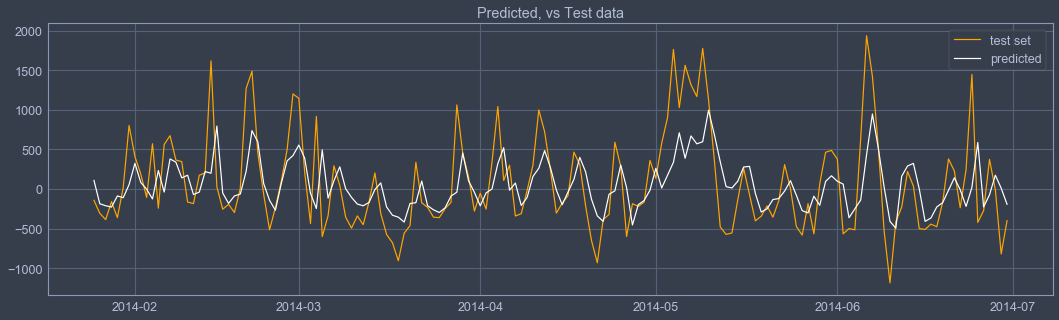

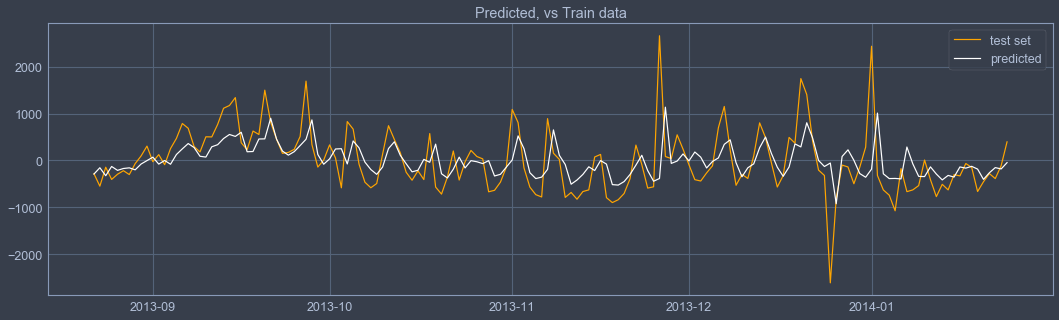

In [152]:
# Train the regressor again according to the selected lag
model, predic_test, coef, intercept, mse, r2 = train_regression_for_lag(x_train, x_test, 7)
col_names = ['d-%d' % (i+1) for i in range(7)]

# Plot the series
plt.figure(figsize=(18,5))
plt.title('Predicted, vs Test data')
plt.plot(x_test.index, x_test['n_rides'], c='orange', label='test set')
plt.plot(x_test.index, predic_test, c='white', label='predicted')

plt.legend()
plt.show()

# Predict the training set
predict_train = model.predict(np.array(x_train[col_names]))

# Plot the series
plt.figure(figsize=(18,5))
plt.title('Predicted, vs Train data')
plt.plot(x_train.index, x_train['n_rides'], c='orange', label='test set')
plt.plot(x_train.index, predict_train, c='white', label='predicted')

plt.legend()
plt.show()


### 3.4.2. Fit a model over all the data and calculate the residuals

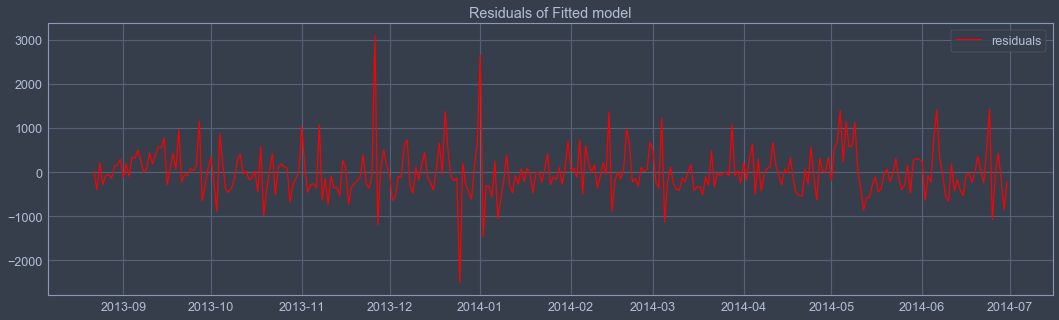

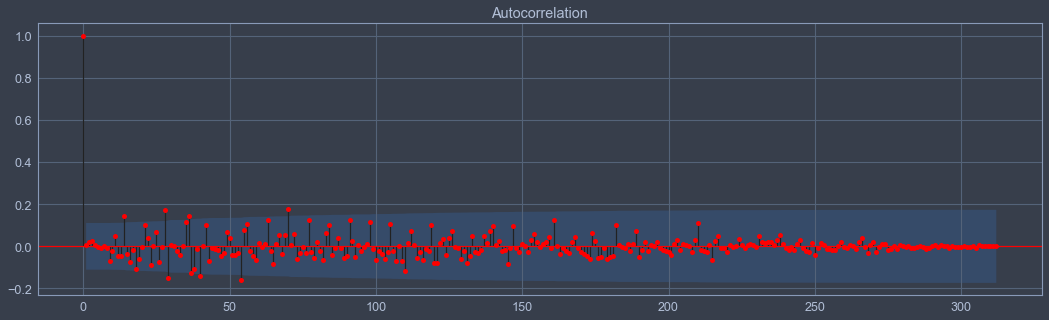

In [182]:
# Train the regressor against all the data
model, predictions, coef, intercept, mse, r2 = train_regression_for_lag(data, data, 7)
col_names = ['d-%d' % (i+1) for i in range(7)]
residuals = data['n_rides']-predictions.ravel()

# Plot the series
plt.figure(figsize=(18,5))
plt.title('Residuals of Fitted model')
plt.plot(data.index, residuals, c='red', label='residuals')
plt.legend()
plt.show()
with plt.rc_context():
    plt.rc("figure", figsize=(18,5))
    plot_acf(residuals, c='red')
    plt.show()

## 3.5. Sample from the learned distribution
use the error statistics of the residuals and plor it's acf
do it 3 times

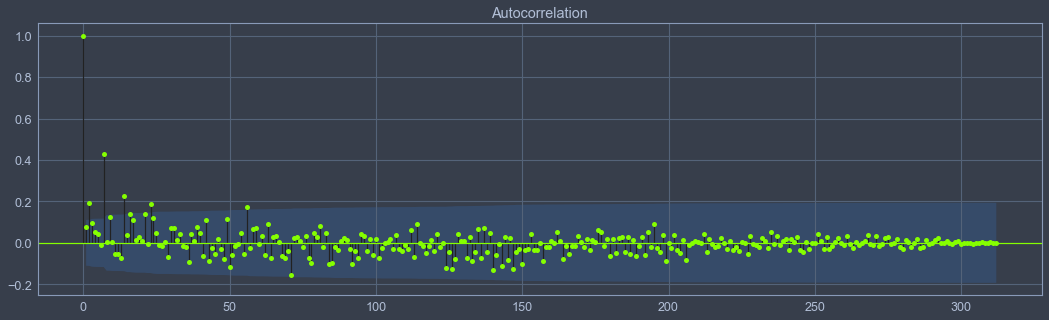

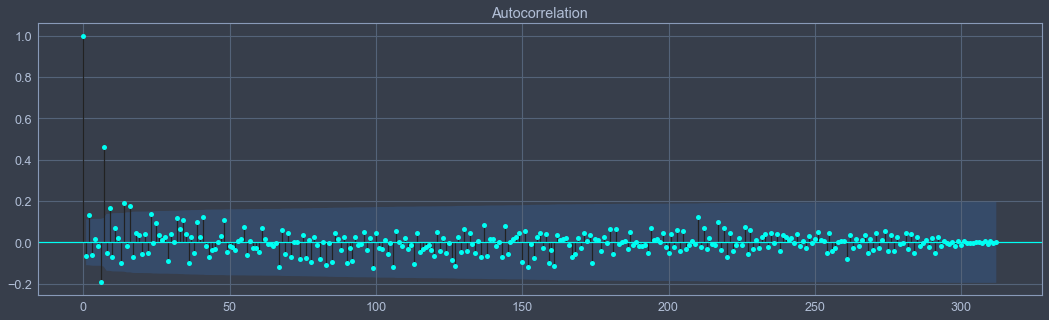

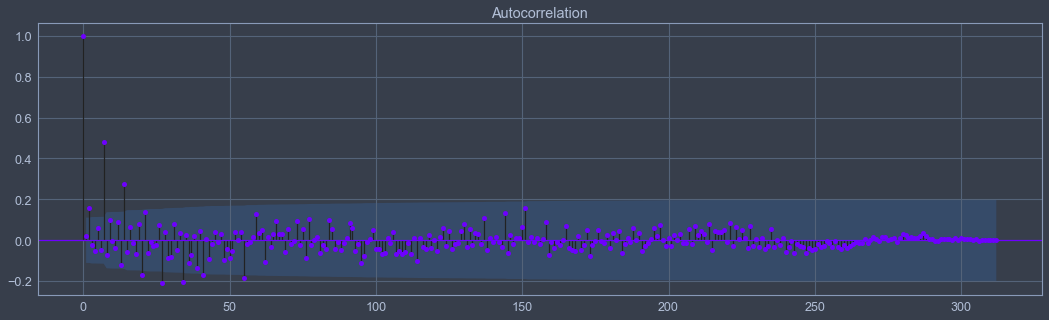

In [166]:
# Let's calculate the standard dev of the residuals
residual_std = residuals.std()

for i in range(3):
    sample = AR(7, intercept, coefs, residual_std, residuals[:7], sample_size=len(residuals))
    with plt.rc_context():
        plt.rc("figure", figsize=(18,5))
        plot_acf(sample, c=plt.cm.get_cmap('hsv', 5)(i+1))
        plt.show()


### Concluding note
After removing the 30-day trend off our data, we have built a predictive auto-regressive model based on a 7 day lag. 

The ACF of the residuals (compared with similar AR models) demonstrates that there is almost no more seasonality or trend in our data. In other words, we managed to extract most of the signal out of the data and the remaining errors in prediction are mostly due to noise.